# Домашняя работа 7 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загружаем датасет

In [3]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

Построим график

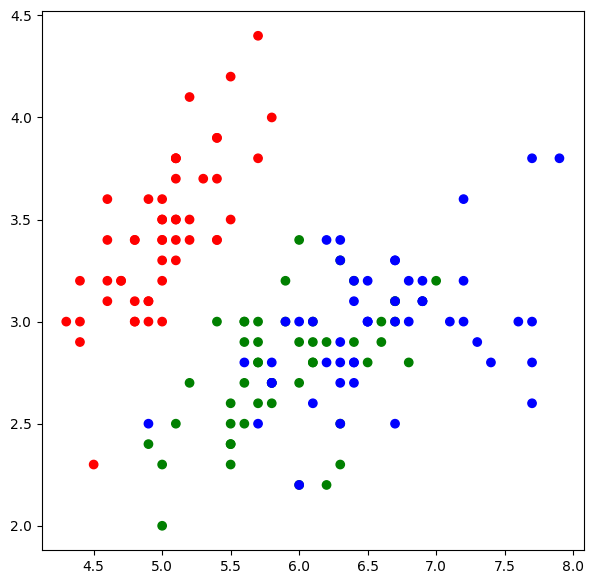

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [6]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска

In [7]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Построим график распределения классов.

In [9]:
def get_graph(X_train, y_train, k, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = model(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

### 1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

Реализуем алгоритм с использованием весов

In [10]:
def knn_w(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k-элементов подсчитаем частоту появления разных классов с учетом весов он номера класса
        for n, d in enumerate(sorted(test_distances)[0:k]):
            classes[d[1]] += (k + 1 - (n + 1)) / k

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Проверим работу алгоритма при различных k:

Точность алгоритма knn при k = 2: 0.733
(2352, 2)


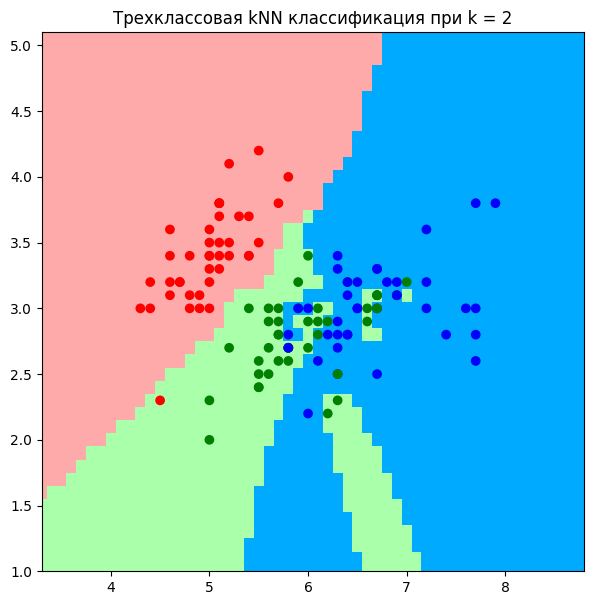

Точность алгоритма knn_w nn при k = 2: 0.700
(2352, 2)


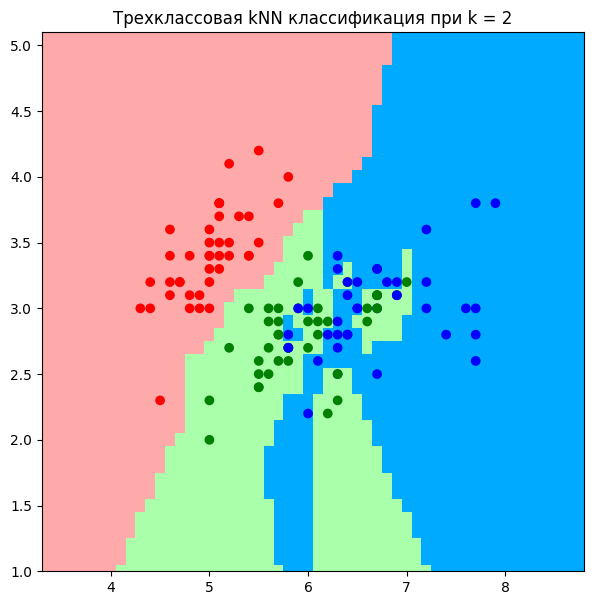

Точность алгоритма knn при k = 4: 0.700
(2352, 2)


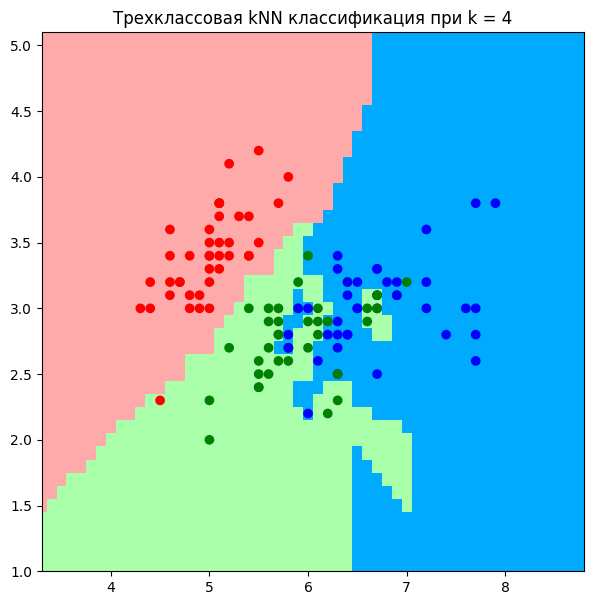

Точность алгоритма knn_w nn при k = 4: 0.700
(2352, 2)


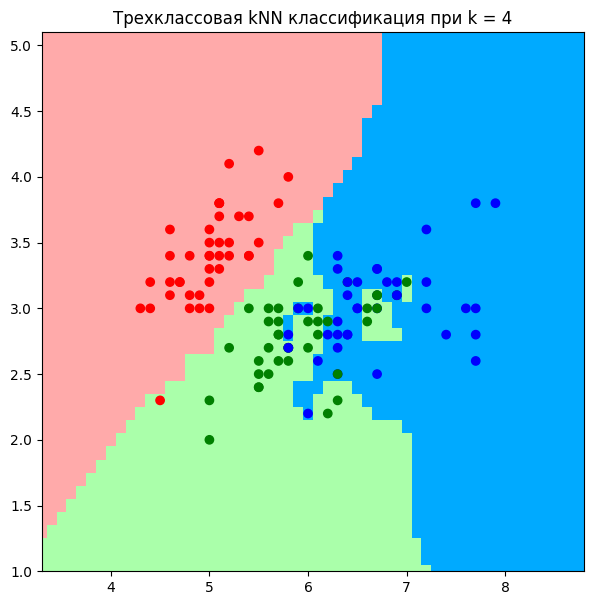

Точность алгоритма knn при k = 6: 0.700
(2352, 2)


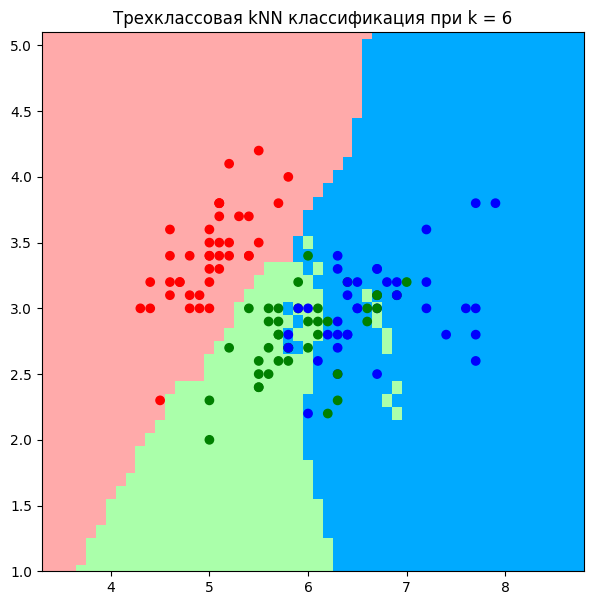

Точность алгоритма knn_w nn при k = 6: 0.733
(2352, 2)


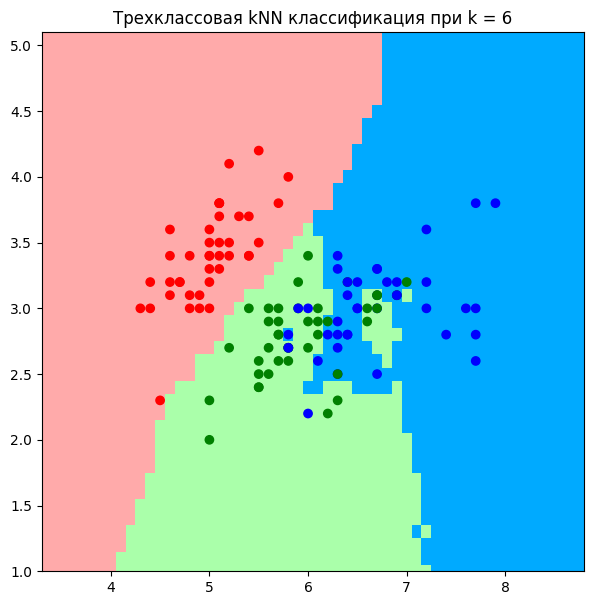

Точность алгоритма knn при k = 8: 0.767
(2352, 2)


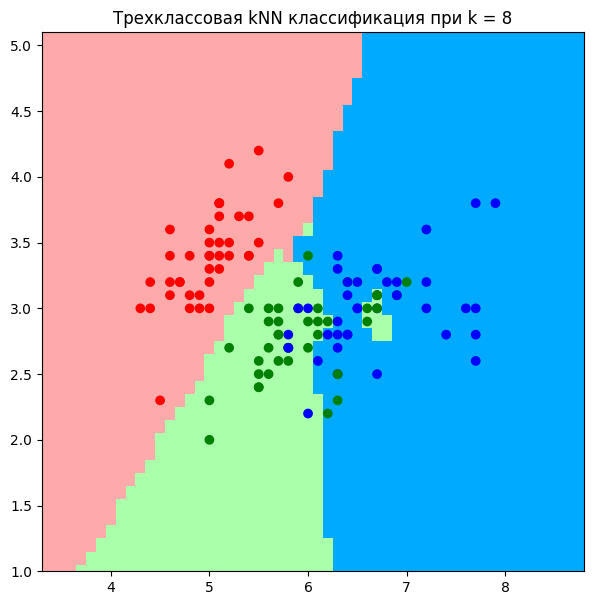

Точность алгоритма knn_w nn при k = 8: 0.733
(2352, 2)


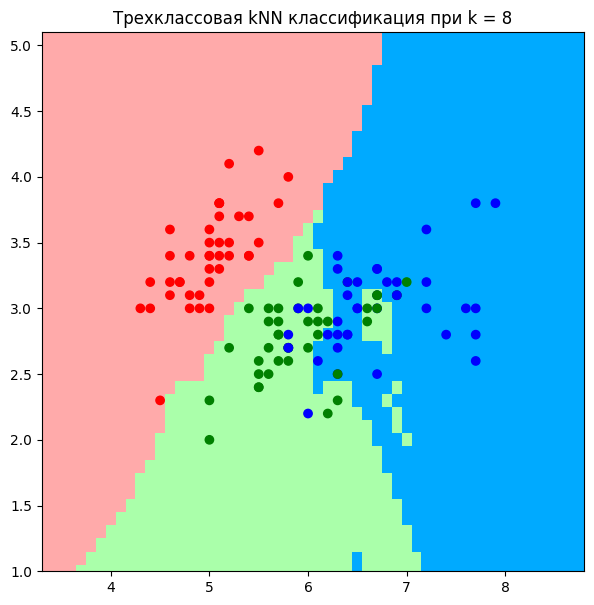

Точность алгоритма knn при k = 10: 0.767
(2352, 2)


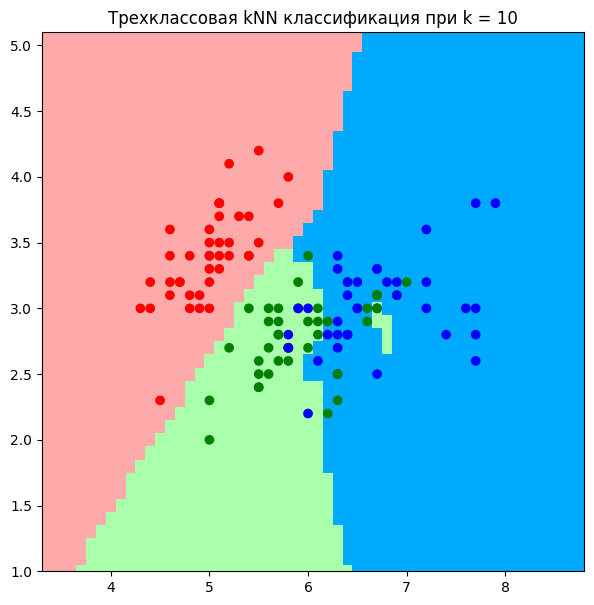

Точность алгоритма knn_w nn при k = 10: 0.733
(2352, 2)


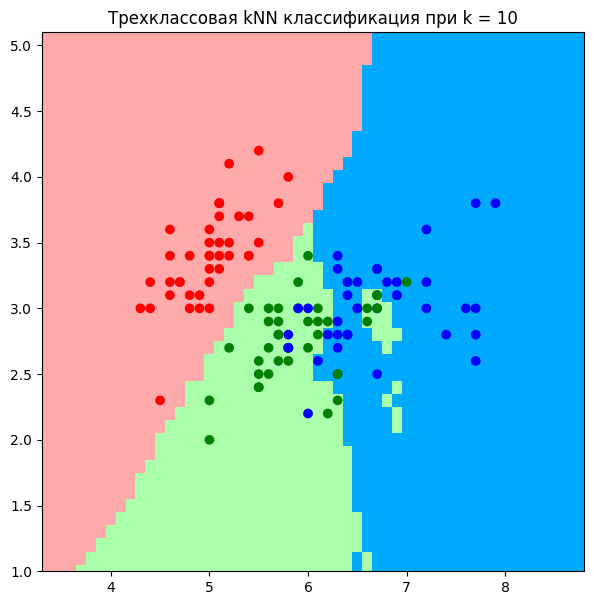

Точность алгоритма knn при k = 12: 0.700
(2352, 2)


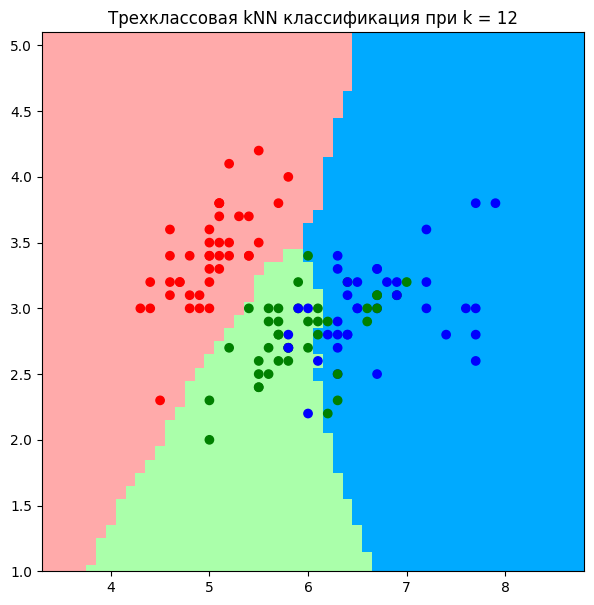

Точность алгоритма knn_w nn при k = 12: 0.733
(2352, 2)


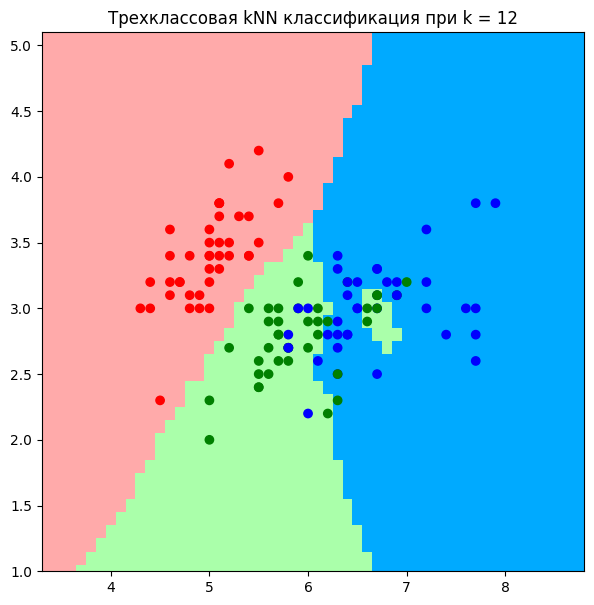

Точность алгоритма knn при k = 14: 0.700
(2352, 2)


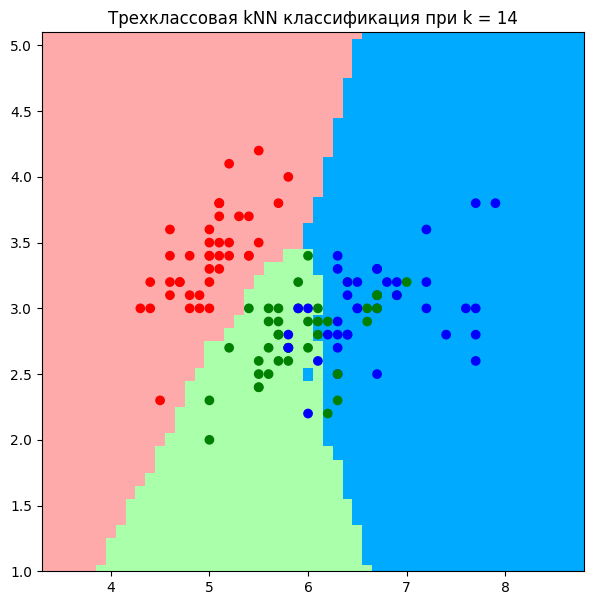

Точность алгоритма knn_w nn при k = 14: 0.733
(2352, 2)


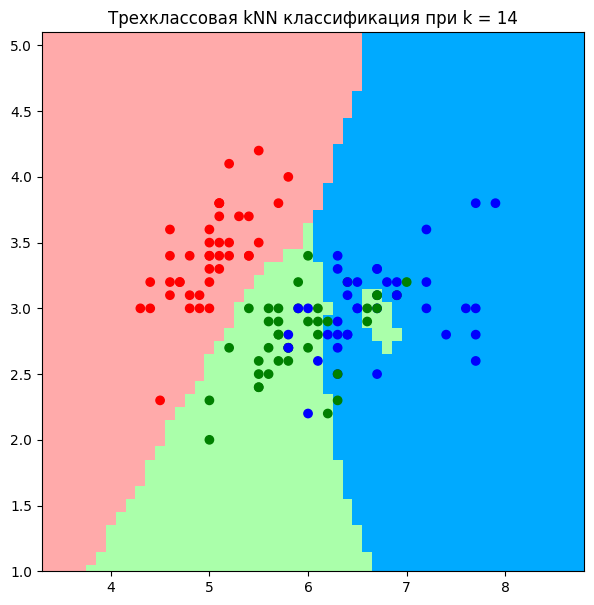

In [13]:
for i in range(2,15,2):
    y_pred = knn(X_train, y_train, X_test, i)
    print(f'Точность алгоритма knn при k = {i}: {accuracy(y_pred, y_test):.3f}')
    get_graph(X_train, y_train, i, knn)
    
    y_pred_w = knn_w(X_train, y_train, X_test, i)
    print(f'Точность алгоритма knn_w nn при k = {i}: {accuracy(y_pred_w, y_test):.3f}')
    get_graph(X_train, y_train, i, knn_w)

### 2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

Вначале сгенерируем три облака точек, используя инструменты sklearn.

In [15]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

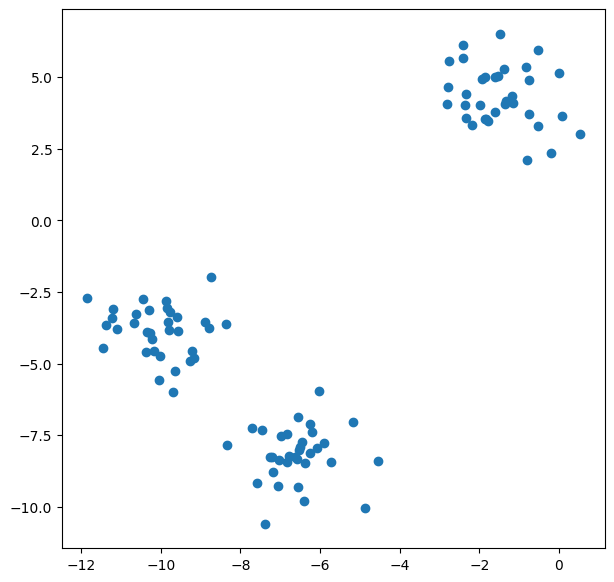

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

Реализуем алгоритм kmeans

In [17]:
def kmeans(data, k, max_iterations = 20, min_distance = 1e-4):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесём объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

Напишем функцию для визуализации кластеров.

In [18]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесём на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесём объекты, раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

Функция среднее квадратичное внутрикластерное расстояние

In [19]:
def quality(centroids, clusters):
    cdist = 0  
    for key in clusters.keys():  
        dist = 0
        for point in clusters[key]: 
            dist += np.square(e_metrics(centroids[key], point))
        dist += dist/len(clusters[key]) 
    return round(dist, 2)

In [21]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчёта и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

In [25]:
quality_arr = []
for k in range(1, 11):
    quality_arr.append(quality(*kmeans(X, k, max_iterations, min_distance)))

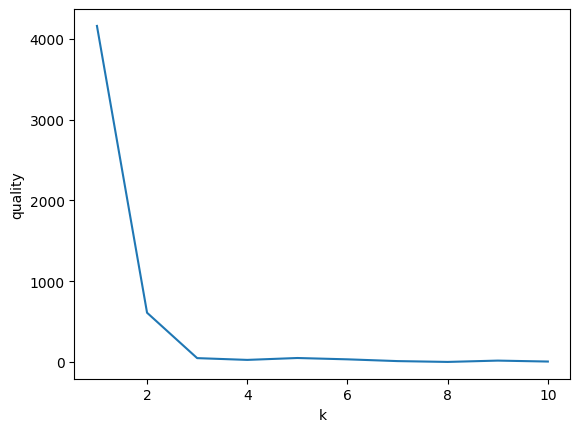

In [26]:
plt.xlabel('k')
plt.ylabel('quality')
plt.plot(np.arange(1, 11), quality_arr)
plt.show()